
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [110]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## 2. Данные

In [111]:
df = pd.read_csv('churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6283,6956-SMUCM,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.00,287.4,Yes
4638,7817-BOQPW,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.55,166.3,Yes
1649,2851-MMUTZ,Female,0,No,No,27,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,56.15,1439.35,No
632,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No
86,4808-YNLEU,Female,0,Yes,No,35,Yes,No,DSL,Yes,No,No,No,Yes,No,One year,Yes,Bank transfer (automatic),62.15,2215.45,No
895,0730-KOAVE,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.30,2679.7,No
5893,3549-ZTMNH,Male,0,Yes,Yes,12,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.00,269.65,No
6406,4450-YOOHP,Female,0,No,No,39,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),50.65,1905.4,No
3710,3724-BSCVH,Male,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,242.4,No
5864,5093-FEGLU,Female,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,921.55,No


In [112]:
# Для справки и понимания посмотрим, что записано в столбцах
for heading in df.columns:
    print(f'Уникальные значения {heading}: {df[heading].unique()}')
    print(f'Число уникальных значений {heading}: {df[heading].nunique()}\n')

Уникальные значения customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Число уникальных значений customerID: 7043

Уникальные значения gender: ['Female' 'Male']
Число уникальных значений gender: 2

Уникальные значения SeniorCitizen: [0 1]
Число уникальных значений SeniorCitizen: 2

Уникальные значения Partner: ['Yes' 'No']
Число уникальных значений Partner: 2

Уникальные значения Dependents: ['No' 'Yes']
Число уникальных значений Dependents: 2

Уникальные значения tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Число уникальных значений tenure: 73

Уникальные значения PhoneService: ['No' 'Yes']
Число уникальных значений PhoneService: 2

Уникальные значения MultipleLines: ['No phone service' 'No' 'Yes']
Число уникальных значений MultipleLines: 3

Уникальные зна

## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [113]:
# посмотрим на типы данных(они уже написаны, но не будем верить на слово)
df.info()
# NaN нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
# ваше решение
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Вывод:**
1. Большая часть клиентов -- непожилые люди (~84 %)
2. В среднем клиенты пользуются  услугами компании 32 месяца (стандартное отклонение большое, ~75% от самого значения), медианное значение 29 месяцев меньше среднего, что показывает смещение распределения влево относительно среднего значения. 25% клиентов пользуются услугами 9 и менее месяцев.
3. Разброс месячной платы от 18.25 до 118.75 у. е., среднее значение 64,76 с довольно большим (~47%) стандартным отклонением. Медианная плата 70,35 больше средней, что означает большую смещённость распределения в сторону платы больше средней. По квантилям видно небольшое смещение в сторону меньшей платы в обеих половинах.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [115]:
df.describe(include = 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Вывод:**
1. Клиентов-женщин и клиентов-мужчин примерно одинаковое количество.
2. Клиентов в браке и холостых примерно одинаковое количество (48 на 52)
3. Клиентов с иждивенцами больше (70 на 30)
4. Большинство клиентов обладают телефонной связью (70 на 30)
5. Клиентов с несколькими линиями связи чуть меньше (48 на 52)
6. Распределение по провайдерам представлено в ячейке ниже 
(вопрос -- как интерпретировать No? У клиента нет интернета?) 
Анализ следующих пунктов выявил, что ответ на этот вопрос -- да.
В итоге я вывел распределения по набору категориальных признаков, по каждому можно сделать свои выводы, я лишь 
укажу некоторые (по моему мнению самые главные).

У 21,6% клиентов нет интернета

Большая часть (~55%) клиентов платит ежемесячно

!!!
26,5% клиентов ушло за последний месяц, наверное этому и будет посвящено задание.

In [116]:
# Что ж, используем концепцию DRY, хотя возможно в Pandas уже есть для этого специальный метод
def display_distribution(*columns):
    for column in columns: 
        display(100*df[column].value_counts()/df[column].value_counts().sum())    

columns_for_distribution = df.columns[8:-3]
display_distribution(*columns_for_distribution)
display_distribution('Churn')

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: count, dtype: float64

OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: count, dtype: float64

OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: count, dtype: float64

DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: count, dtype: float64

TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: count, dtype: float64

StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: count, dtype: float64

StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: count, dtype: float64

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: count, dtype: float64

PaperlessBilling
Yes    59.221922
No     40.778078
Name: count, dtype: float64

PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: count, dtype: float64

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [117]:
# ваше решение
df.duplicated().sum()
# дубликатов нет, доппроверка
df.duplicated('customerID').sum()
# дубликатов нет

0

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [118]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [119]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [120]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [121]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2590,4526-ZJJTM,Female,1,Yes,No,25,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),88.40,2191.15,No
817,0036-IHMOT,Female,0,Yes,Yes,55,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.70,5656.75,No
3268,6778-EICRF,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,74.80,1821.20,No
2049,1170-SASML,Female,0,Yes,No,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.40,5869.40,No
1679,0999-QXNSA,Male,1,No,Yes,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.75,344.20,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [122]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [123]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [124]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [125]:
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipykernel_3346/171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [126]:
# Казалось бы на данном этапе это не нужно
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6985,6967-PEJLL,Male,0,Yes,Yes,37,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Electronic check,40.20,1525.35,No
5193,7096-ZNBZI,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.45,1914.50,No
5128,4128-ETESU,Female,1,Yes,No,47,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.70,4747.20,No
6778,5893-KCLGT,Female,0,No,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.75,1567.00,No
181,6582-OIVSP,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.30,45.30,No


**Вывод:**

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [127]:
# Формируем две выборки 
churn_yes_tenure = df[df['Churn'] == 'Yes']['tenure']
churn_no_tenure = df[df['Churn'] == 'No']['tenure']

# Для интереса посмотрим на средние значения
print(f'Среднее количество месяцев у оставшихся клиентов: {churn_no_tenure.mean()}')
print(f'Среднее количество месяцев у ушедших клиентов: {churn_yes_tenure.mean()}')

# Значения абсолютно разные
# Далее делаем как в обучающем материале 
# (возможно следует проверить данные на нормальность, но с учётом предыдущего пункта это вряд ли имеет смысл)

alpha = .05

_, pvalue = stats.ttest_ind(churn_no_tenure, churn_yes_tenure)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')


Среднее количество месяцев у оставшихся клиентов: 37.56996521066873
Среднее количество месяцев у ушедших клиентов: 17.979133226324237
P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:**
Предложенные выборки обладают статитически значимыми различиями. Среднее число проведённых с компанией месяцев для оставшихся и ушедших клиентов
различается.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответствуют ли распределения нормальному?

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

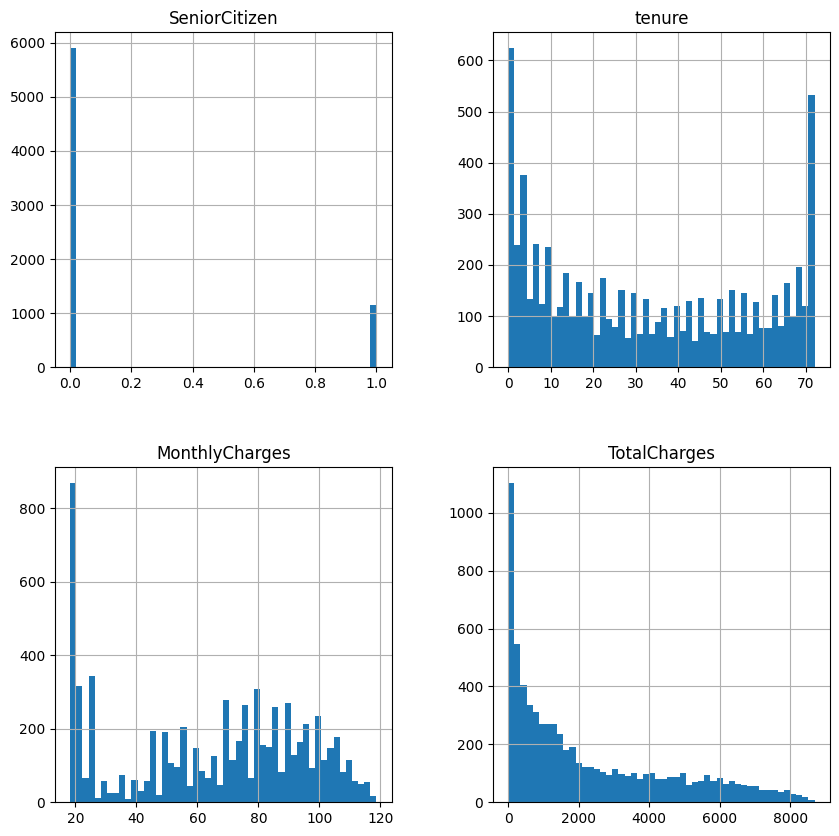

In [128]:
# Из рисунков видно, что ни один из числовых признаков не распределён нормально.
# MonthlyCharges похоже на нормальное распределение с выбросами
# потребуется в дальнейшем
list_of_df_numerical = df.select_dtypes(exclude = 'object').columns
list_of_df_categorical = df.iloc[:, 1:].select_dtypes(include = 'object').columns
list_of_df_categorical = list_of_df_categorical.append(pd.Index(['SeniorCitizen']))
list_of_df_numerical = list_of_df_numerical.delete(0)
print(list_of_df_numerical, list_of_df_categorical)

df.hist(figsize=(10, 10), bins=50)

In [129]:
# Вспомним сколько у нас строк в датасете
# len(df)   7063
# Тест Шапиро-Уилка не подойдёт
# Нулевая гипотеза -- распределение нормальное
def is_normal_dist_DAgostino(dataset):
    numeric_columns_only = dataset.select_dtypes(exclude = 'object')
    for column in numeric_columns_only:
        _, pvalue = stats.normaltest(df[column])
        alpha = 0.05
        print(f'Результат для {column}')
        if pvalue < alpha:
            print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается. Распределение не является нормальным.')
        else:
            print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза. Распределение является нормальным.')
        print(f'Значение t-параметра: {_}\n')   # Для того, чтобы убедиться, что нулевые значения p-value адекватны

is_normal_dist_DAgostino(df)
# print(stats.normaltest(df['TotalCharges']))


Результат для SeniorCitizen
P-value:0.00000. Нулевая гипотеза отвергается. Распределение не является нормальным.
Значение t-параметра: 2089.738116578829

Результат для tenure
P-value:0.00000. Нулевая гипотеза отвергается. Распределение не является нормальным.
Значение t-параметра: 76258.50517392668

Результат для MonthlyCharges
P-value:0.00000. Нулевая гипотеза отвергается. Распределение не является нормальным.
Значение t-параметра: 11419.528789007898

Результат для TotalCharges
P-value:0.00000. Нулевая гипотеза отвергается. Распределение не является нормальным.
Значение t-параметра: 808.5951533693892



**Вывод:**
Все числовые признаки не являются нормально распределёнными, чего и следовало ожидать исходя из графической зависимости

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

In [130]:
# Шаг 1 -- кодируем категориальные переменные
def categorize_object_columns(dataset):
    list_of_indexes = []
    object_columns_only = dataset.select_dtypes(include = 'object')
    for column in object_columns_only:
        if column != 'customerID':
            dataset[column], index = pd.factorize(dataset[column])
            list_of_indexes.append((column, index))
    return dataset, list_of_indexes

df_coded, df_list_of_indexes = categorize_object_columns(df.copy())
df_coded = df_coded.iloc[:, 1:] # уберём Id, он для анализа не нужен

Сформулируем набор гипотез, почему клиент мог уйти (для этого интересно узнать, чем вообще занимается эта компания).

1. Churn коррелирует с признаком SeniorCitizen
2. Churn коррелирует с признаком Gender
3. Churn коррелирует с одним из категориальных признаков, связанных с услугами (интернет-провайдер, стриминговые сервисы, резервное копирование и т. д.). Клиенты могли массово уйти из-за ухудшения условий обслуживания/конкурентов с более выгодными условиями

Можно пофильтровать часть критериев, посмотреть с чем коррелирует уход мужчин/женщин/пожилых людей/клиентов с большим/маленьким чеком и т. д. Так же интересно посмотреть сколько новых пользователей (с значением в столбце tenure равным нулю) и проделать тот же самый анализ, убрав их, поскольку новые пользователи вряд-ли как-то влияют на тех, кто уходил.

Здесь было бы интересно узнать у компании как они кодируют людей (как скореллированые ушедшие и новые клиенты), возможно часть клиентов сменила тариф/способ оплаты и т. д. и это могло записаться как уход и приход клиента.

In [131]:
# Категориальные & Churn
# Два категориальных признака, используем хи-квадрат тест

def chi2_test(dataset, target_column, list_of_categoriсal):
    list_of_dependent = []
    for column in list_of_categoriсal:
        crosstab = pd.crosstab(df_coded[target_column], df_coded[column])

        stat, pvalue, _, exp_freq = stats.chi2_contingency(crosstab)
        alpha = 0.05
        print(f'Результат для признака {column}')
        print(f'Statistics={stat}, p-value: {pvalue}')
        if pvalue <= alpha:
            print('Зависимый (отклонить H0)')
            print(crosstab)
            print(exp_freq)
            list_of_dependent.append(column)
        else:
            print('Независимый (не удается отклонить H0)')
        print('\n')
    print(f'Зависимые переменные: {list_of_dependent}')
    return list_of_dependent

lod = chi2_test(df_coded, 'Churn', list_of_df_categorical)

Результат для признака gender
Statistics=0.4840828822091383, p-value: 0.48657873605618596
Независимый (не удается отклонить H0)


Результат для признака Partner
Statistics=158.7333820309922, p-value: 2.1399113440759935e-36
Зависимый (отклонить H0)
Partner     0     1
Churn              
0        2733  2441
1         669  1200
[[2499.21169956 2674.78830044]
 [ 902.78830044  966.21169956]]


Результат для признака Dependents
Statistics=189.12924940423474, p-value: 4.9249216612154196e-43
Зависимый (отклонить H0)
Dependents     0     1
Churn                 
0           3390  1784
1           1543   326
[[3623.93042737 1550.06957263]
 [1309.06957263  559.93042737]]


Результат для признака PhoneService
Statistics=0.9150329892546948, p-value: 0.3387825358066928
Независимый (не удается отклонить H0)


Результат для признака MultipleLines
Statistics=11.33044148319756, p-value: 0.0034643829548773
Зависимый (отклонить H0)
MultipleLines    0     1     2
Churn                         
0          

In [132]:
# построим Phik-корреляцию для категориальных переменных
import matplotlib.pyplot as plt # библиотека для визуализации данных

import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


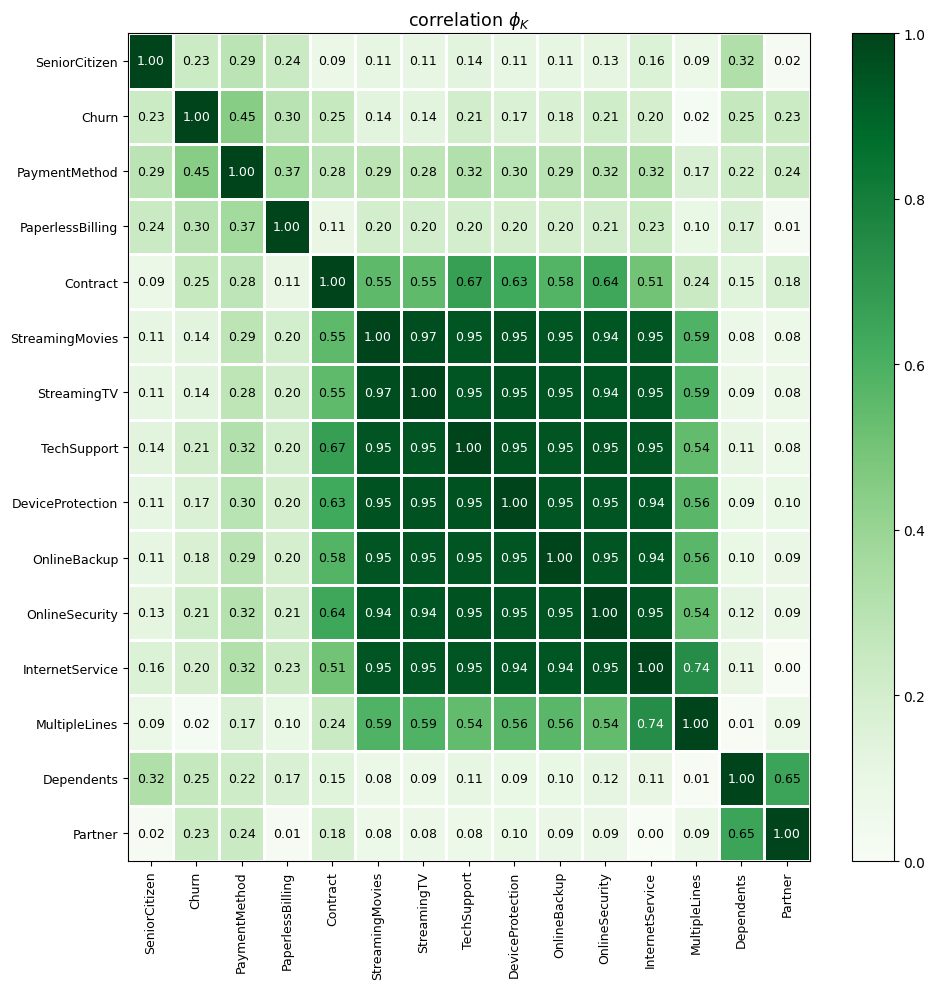

In [133]:
phik_overview = df_coded[lod].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
# plt.tight_layout()

In [134]:
# Одна из гипотез подтвердилась -- ушедшие клиенты в среднем были меньше по времени клиентами компании
# Следующая нулевая гипотеза -- ушедшие и оставшиеся клиенты платили в месяц в среднем одинаково

churn_yes_mc = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no_mc = df[df['Churn'] == 'No']['MonthlyCharges']

# Для интереса посмотрим на средние значения
print(f'Средняя месячная плата у оставшихся клиентов: {churn_no_mc.mean()}')
print(f'Средняя месячная плата у ушедших клиентов: {churn_yes_mc.mean()}')

# Значения абсолютно разные
# Далее делаем как в обучающем материале 
# (возможно следует проверить данные на нормальность, но с учётом предыдущего пункта это вряд ли имеет смысл)

alpha = .05

_, pvalue = stats.ttest_ind(churn_yes_mc, churn_no_mc)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

print(pvalue)


Средняя месячная плата у оставшихся клиентов: 61.26512369540008
Средняя месячная плата у ушедших клиентов: 74.44133226324237
P-value:0.00000. Нулевая гипотеза отвергается
2.7066456068884154e-60


In [135]:
churn_yes_tc = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no_tc = df[df['Churn'] == 'No']['TotalCharges']

# Для интереса посмотрим на средние значения
print(f'Общие затраты у оставшихся клиентов: {churn_no_tc.mean()}')
print(f'Общие затраты у ушедших клиентов: {churn_yes_tc.mean()}')

# Значения абсолютно разные
# Далее делаем как в обучающем материале 
# (возможно следует проверить данные на нормальность, но с учётом предыдущего пункта это вряд ли имеет смысл)

alpha = .05

_, pvalue = stats.ttest_ind(churn_yes_tc, churn_no_tc)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

print(pvalue)

Общие затраты у оставшихся клиентов: 2549.911441824507
Общие затраты у ушедших клиентов: 1531.7960941680042
P-value:0.00000. Нулевая гипотеза отвергается
2.127211613240394e-63


interval columns not set, guessing: ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']


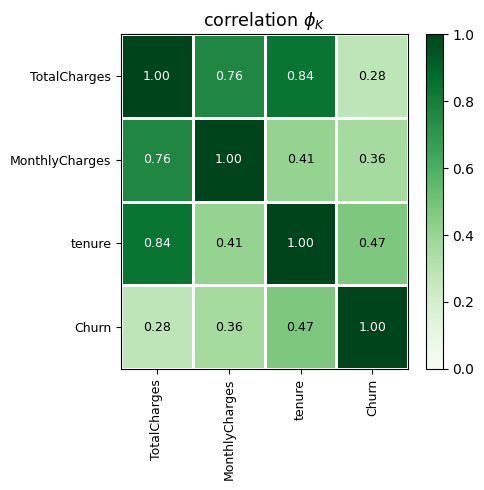

In [136]:
phik_overview = df_coded[['Churn', *list_of_df_numerical]].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(5, 5))

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Итоговые выводы:

1. Ушедшие клиенты в среднем меньше времени были клиентами компании, за всё время заплатили ей меньше денег, но при этом средняя месячная плата у них была больше.
2. Уход клиента не зависит от его пола, но зависит от наличия партнёра, возраста и наличия иждивенцев -- среди ушедших перекос в сторону одиноких пожилых людей без иждивенцев.
3. Есть группа сильно скоррелированных показателей:
InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
По всей видимости эти опции подключаются единым пакетом. Хи-квадрат тест показывает зависимость между
уходом клиента и этим показателем, но phik-коэффициент корреляции довольно мал (~0,2).
4. MultipleLines как таковой зависимости нет
5. По показателю Contract есть перекос в сторону тех клиентов, кто платит ежемесячно.
6. Есть корреляция 0,45 c PaymentMethod, среди ушедших перекос в сторону
'Mailed check', 'Bank transfer (automatic)',
         'Credit card (automatic)'
7. Есть корреляция 0,30 с PaperlessBilling, среди ушедших перекос в сторону Yes

In [137]:
df_list_of_indexes

[('gender', Index(['Female', 'Male'], dtype='object')),
 ('Partner', Index(['Yes', 'No'], dtype='object')),
 ('Dependents', Index(['No', 'Yes'], dtype='object')),
 ('PhoneService', Index(['No', 'Yes'], dtype='object')),
 ('MultipleLines', Index(['No phone service', 'No', 'Yes'], dtype='object')),
 ('InternetService', Index(['DSL', 'Fiber optic', 'No'], dtype='object')),
 ('OnlineSecurity',
  Index(['No', 'Yes', 'No internet service'], dtype='object')),
 ('OnlineBackup', Index(['Yes', 'No', 'No internet service'], dtype='object')),
 ('DeviceProtection',
  Index(['No', 'Yes', 'No internet service'], dtype='object')),
 ('TechSupport', Index(['No', 'Yes', 'No internet service'], dtype='object')),
 ('StreamingTV', Index(['No', 'Yes', 'No internet service'], dtype='object')),
 ('StreamingMovies',
  Index(['No', 'Yes', 'No internet service'], dtype='object')),
 ('Contract',
  Index(['Month-to-month', 'One year', 'Two year'], dtype='object')),
 ('PaperlessBilling', Index(['Yes', 'No'], dtype='

Посмотрим на клиентов, у которых контракт длится фиксированное время. Интересно посмотреть, сколько среди
них ушедших, возможно у кого-то просто закончился контракт.


Вывод:
Среди них не так много ушедших, и они не составляют критическую массц от всех ушедших.

In [138]:
# 1 год
print(len(df[(df['Contract'] == 'One year') & (df['Churn'] == 'Yes')]))
print(len(df[df['Contract'] == 'One year']))

166
1473


In [139]:
# 2 года
print(len(df[(df['Contract'] == 'Two year') & (df['Churn'] == 'Yes')]))
print(len(df[df['Contract'] == 'Two year']))

48
1695


In [140]:
len(df[df['Churn'] == 'Yes'])

1869